# Part A: Data Preprocessing and Imputation

In [33]:
# import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Load and Prepare the data

In [34]:
# Load the dataset
df = pd.read_csv("UCI_Credit_Card.csv")
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [35]:
# Check for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

> No null/missing values found in any of the columns

In [36]:
# Check the first few rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Remove ID column & Process the values in EDUCATION column


In [37]:
# Remove ID column since it's not relevant for prediction
df.drop('ID', axis=1, inplace=True)

# Change EDUCATION column having values 0,5 and 6 to 5
df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6), 'EDUCATION'] = 5

# Print the distribution of data in EDUCATION column
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64

#### Plot data distribution within Categorical columns

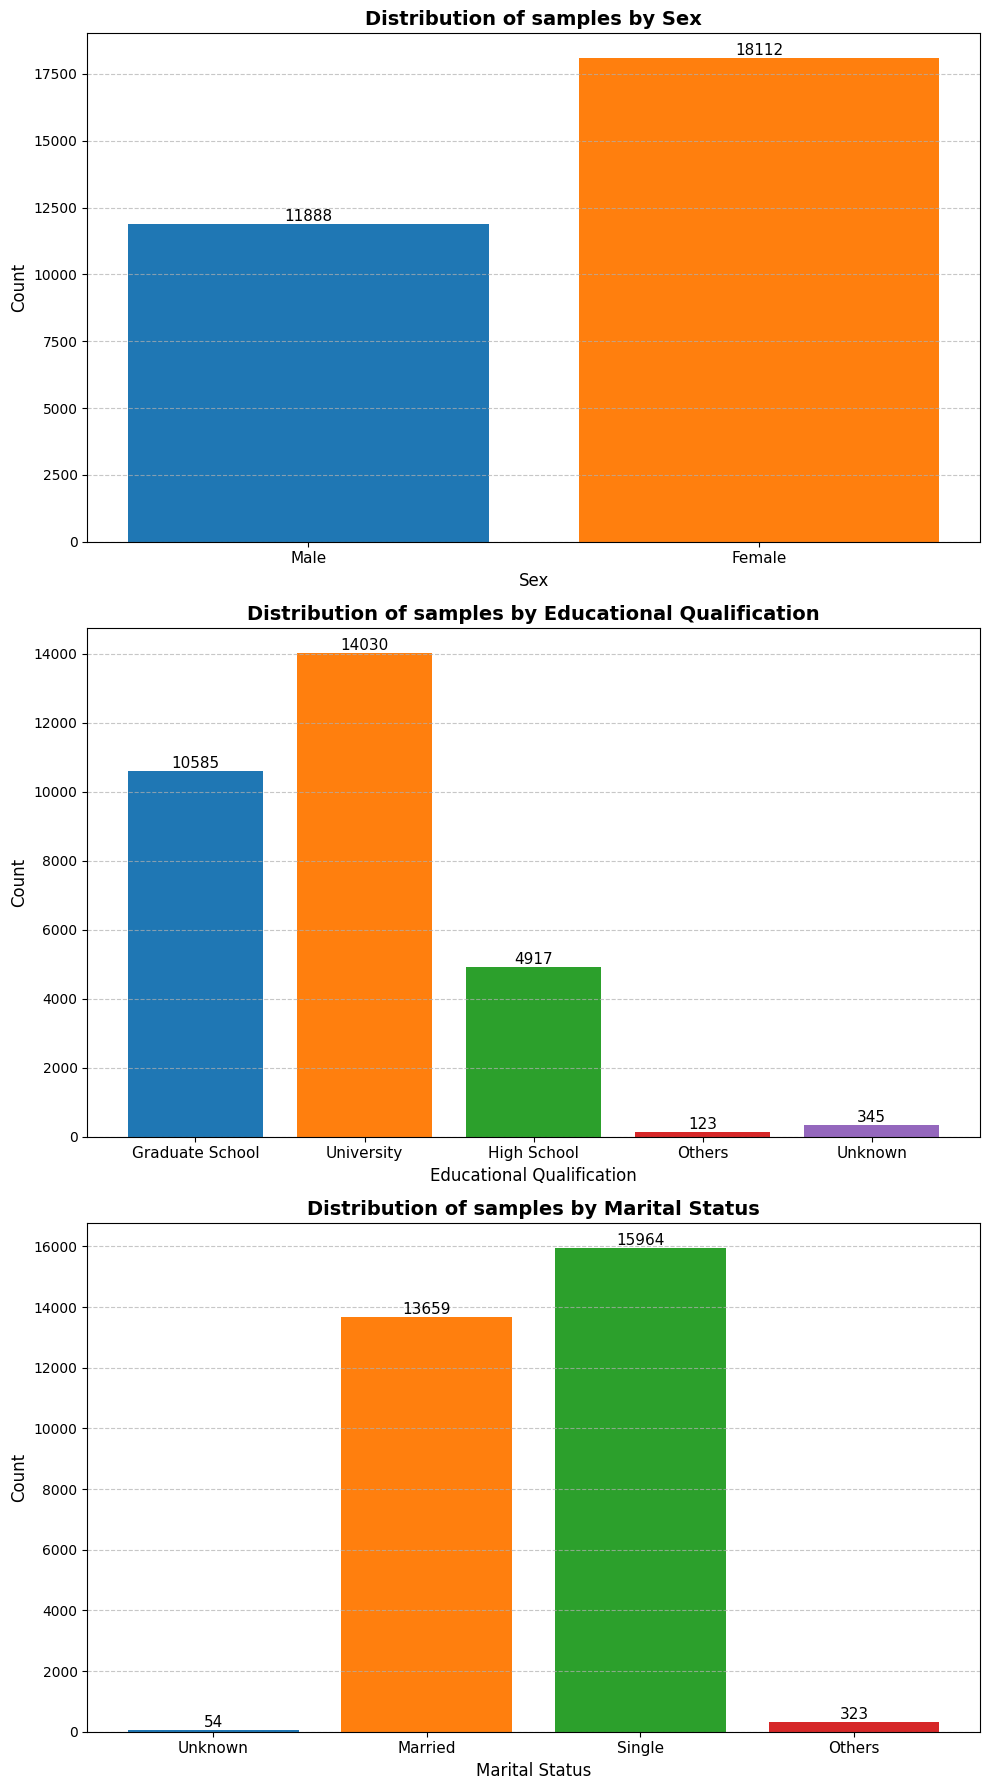

In [38]:
warnings.filterwarnings("ignore")

# Define mapping dictionaries for labels
sex_labels = {1: 'Male', 2: 'Female'}
education_labels = {
    1: 'Graduate School', 2: 'University', 3: 'High School',
    4: 'Others', 5: 'Unknown', 6: 'Unknown'
}
marriage_labels = {1: 'Married', 2: 'Single', 3: 'Others'}

# Prepare data for plotting
columns = {
    'SEX': sex_labels,
    'EDUCATION': education_labels,
    'MARRIAGE': marriage_labels
}

cmap = plt.get_cmap('tab10')  # You can choose any colormap

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

for ax, (col, labels) in zip(axes, columns.items()):
    counts = df[col].value_counts().sort_index()
    categories = [labels.get(cat, 'Unknown') for cat in counts.index]
    colors = [cmap(i) for i in range(len(categories))]

    bars = ax.bar(categories, counts.values, color=colors)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(categories)))  # Fix: set x-tick positions
    ax.set_xticklabels(categories, fontsize=11)

    for bar in bars:
        ax.annotate(f"{int(bar.get_height()):d}",
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=11)

axes[0].set_title('Distribution of samples by Sex', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex', fontsize=12)
axes[1].set_title('Distribution of samples by Educational Qualification', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Educational Qualification', fontsize=12)
axes[2].set_title('Distribution of samples by Marital Status', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Marital Status', fontsize=12)

plt.tight_layout()
plt.show()

#### Analyze class imbalance

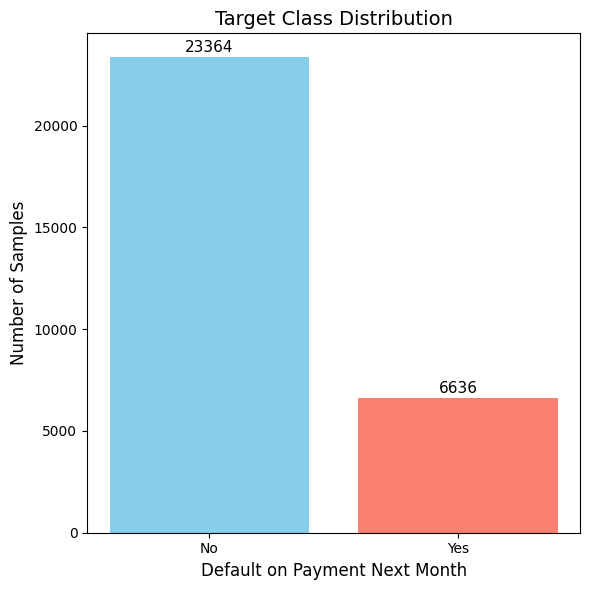

In [39]:
# Count the frequency of each class label
class_counts = df['default.payment.next.month'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Default on Payment Next Month', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Target Class Distribution', fontsize=14)

# Replace 0 and 1 with 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'])

# Add count labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

> The plot shows a strong class imbalance in the UCI credit card dataset: the majority class (“No Default Next Month”) has **23,364** samples (**3.5 times** the minority class), while the minority class (“Default Next Month”) has only **6,636** samples. 

> However, since the minority class is over 10% of the entire dataset, no special measure is required to mitigate the class imbalance issue.

#### Analyze correlation between features columns and target column

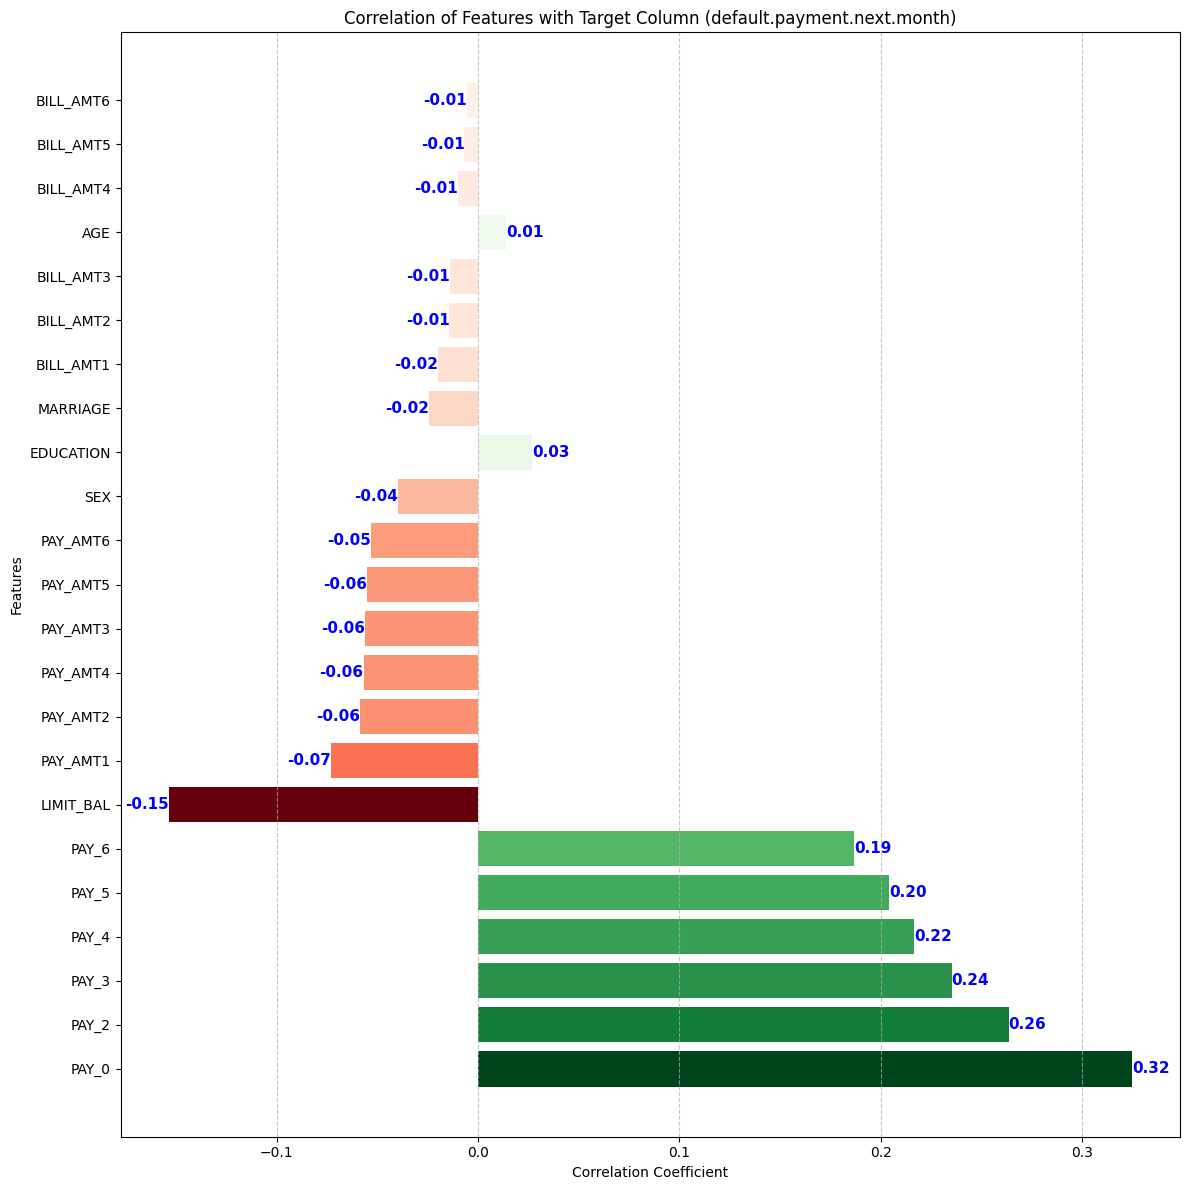

In [40]:
# Exclude target column itself when calculating correlations
correlations = df.corr()[['default.payment.next.month']].drop('default.payment.next.month')

# Sort correlations by absolute value descending
correlations_sorted = correlations.reindex(correlations['default.payment.next.month'].abs().sort_values(ascending=False).index)

# Normalize scales for coloring positive and negative separately
pos_vals = correlations_sorted['default.payment.next.month'].clip(lower=0)
neg_vals = (-correlations_sorted['default.payment.next.month']).clip(lower=0)

# Normalize positive and negative values to [0,1]
pos_norm = plt.Normalize(0, pos_vals.max() if pos_vals.max() > 0 else 1)
neg_norm = plt.Normalize(0, neg_vals.max() if neg_vals.max() > 0 else 1)

# Create green colors for positive correlations and red colors for negative correlations
colors = []
for val in correlations_sorted['default.payment.next.month']:
    if val >= 0:
        colors.append(plt.cm.Greens(pos_norm(val)))
    else:
        colors.append(plt.cm.Reds(neg_norm(-val)))

plt.figure(figsize=(12, 12))
bars = plt.barh(correlations_sorted.index, correlations_sorted['default.payment.next.month'], color=colors)
plt.title('Correlation of Features with Target Column (default.payment.next.month)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate with light yellow
for bar, val in zip(bars, correlations_sorted['default.payment.next.month']):
    plt.text(
        x=val, 
        y=bar.get_y() + bar.get_height() / 2, 
        s=f'{val:.2f}',
        va='center',
        ha='left' if val >= 0 else 'right',
        color='#0000FF',  # light yellow
        fontsize=11,
        fontweight='bold'
    )

plt.show()

Key observations from the correlation plot of features with the target (`default.payment.next.month`) in the UCI credit card dataset:
- The `PAY_X` features (such as PAY_0, PAY_2, PAY_3) show the **strongest positive correlation** with default status, indicating that recent payment status is highly predictive of customer default behavior.

- `LIMIT_BAL` (credit limit) has a **moderate negative correlation** with default status, suggesting that customers with higher credit limits are less likely to default.

- **Most** bill amount (`BILL_AMT`), demographic (AGE, SEX, EDUCATION, MARRIAGE), and payment amount (`PAY_AMT`) features show **weak or negligible correlation** with the default outcome.

- **No single feature** shows **very strong correlation**, highlighting that predicting default likely requires combining multiple features in a model.

#### Analyze importance of features using Lasso coefficients

We will use Lasso regression to analyze the importance of features in determining the target variable. 

Lasso regression is a linear regression model that uses L1 regularization to shrink the coefficients of less important features to zero, effectively removing them from the model.

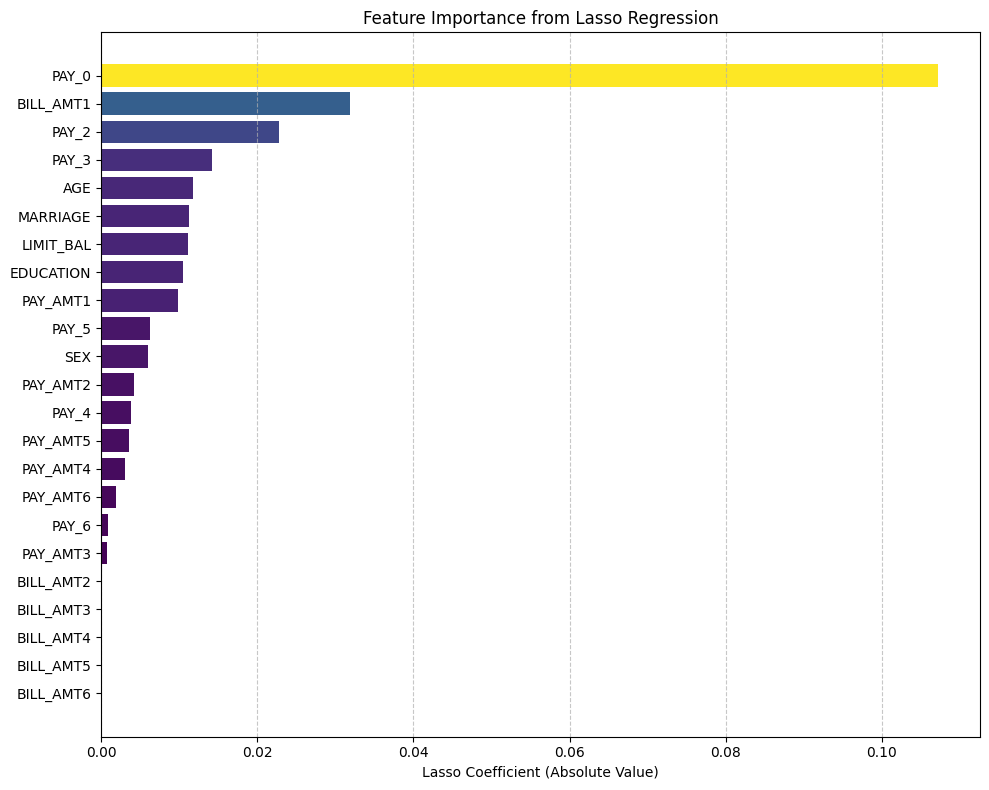

In [41]:
# Assuming df is already defined
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
coef = lasso.coef_

feature_importance = pd.Series(np.abs(coef), index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Create color array from colormap
normed = (feature_importance.values - feature_importance.values.min()) / (feature_importance.values.max() - feature_importance.values.min() + 1e-12)
colors = plt.cm.viridis(normed)

plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance.index, feature_importance.values, color=colors)
plt.xlabel('Lasso Coefficient (Absolute Value)')
plt.title('Feature Importance from Lasso Regression')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observations

- `PAY_0` is by far the `most significant` predictor of default, with a much higher coefficient than any other feature.

- Other payment status and billing features like BILL_AMT1, PAY_2, and PAY_3 also have moderate importance.

- Demographic factors (AGE, MARRIAGE, EDUCATION, SEX) and limit balance (LIMIT_BAL) contribute, but are less influential.

- Many bill amount and payment amount features (BILL_AMT 2-6, PAY_AMT 3-6) show very low or `zero importance`, indicating Lasso considers them less relevant for predicting default.

- Overall, `repayment status` and `recent financial behavior` are `most critical` for identifying default risk in this dataset.

#### Select feature columns to introduce missing values
- `dfA`: We will select `PAY_0`, `LIMIT_BAL` and `PAY_2` columns to introduce missing values for median imputation.

- `dfB`: We will select `PAY_0` column to introduce missing values for linear regression imputation.

- `dfC`: We will select `PAY_0` column to introduce missing values for decision tree imputation.

- `dfD`: We will delete rows from `dfA` where any of the feature/columns have missing values.

- The reason for selecting these columns is that they exhibit high correlation (plot above) and high feature importance (plot above) with respect to the target variable.

In [42]:
# Copy the original DataFrame
dfA = df.copy()
dfB = df.copy()
dfC = df.copy()

# set missing fraction
frac = 0.1

# Set random seed for reproducibility
np.random.seed(42)

# Helper function to randomly assign NaN to 10% of rows in a column
def add_missing_values(dataframe, column, frac):
    missing_indices = dataframe.sample(frac=frac).index
    dataframe.loc[missing_indices, column] = np.nan
    return dataframe

# dfA — random 10% missing values in 'PAY_0', 'LIMIT_BAL', 'PAY_2'
for col in ['PAY_0', 'LIMIT_BAL', 'PAY_2']:
    dfA = add_missing_values(dfA, col, frac)

# dfB — random 10% missing values only in 'PAY_0'
dfB = add_missing_values(dfB, 'PAY_0', frac)

# dfC — random 10% missing values only in 'PAY_0' (as per same condition)
dfC = add_missing_values(dfC, 'PAY_0', frac)

# dfD — all rows from dfA where none of the specified columns are null
dfD = dfA.dropna(subset=['PAY_0', 'LIMIT_BAL', 'PAY_2'])

# Optional: Check count of missing values per DataFrame
print("Missing values in dfA:")
print(dfA[['PAY_0', 'LIMIT_BAL', 'PAY_2']].isnull().sum(), end="\n\n")
print("Missing values in dfB:")
print(dfB['PAY_0'].isnull().sum(), end="\n\n")
print("Missing values in dfC:")
print(dfC['PAY_0'].isnull().sum(), end="\n\n")
print("Shape of dfD:")
print(dfD.shape)

Missing values in dfA:
PAY_0        3000
LIMIT_BAL    3000
PAY_2        3000
dtype: int64

Missing values in dfB:
3000

Missing values in dfC:
3000

Shape of dfD:
(21876, 24)


We have introduced missing values equivalent to 10% of the overall sample size in each of the columns `PAY_0`, `LIMIT_BAL` and `PAY_2` of the dataset.

### Imputation Strategy-1: Simple Imputation (Baseline)

Fill the missing values in dfA with the median of respective column data

In [43]:
# fill missing values with median
dfA['PAY_0'] = dfA['PAY_0'].fillna(dfA['PAY_0'].median())
dfA['LIMIT_BAL'] = dfA['LIMIT_BAL'].fillna(dfA['LIMIT_BAL'].median())
dfA['PAY_2'] = dfA['PAY_2'].fillna(dfA['PAY_2'].median())

In [44]:
# Verify no missing values in dfA
print(dfA.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using median imputation

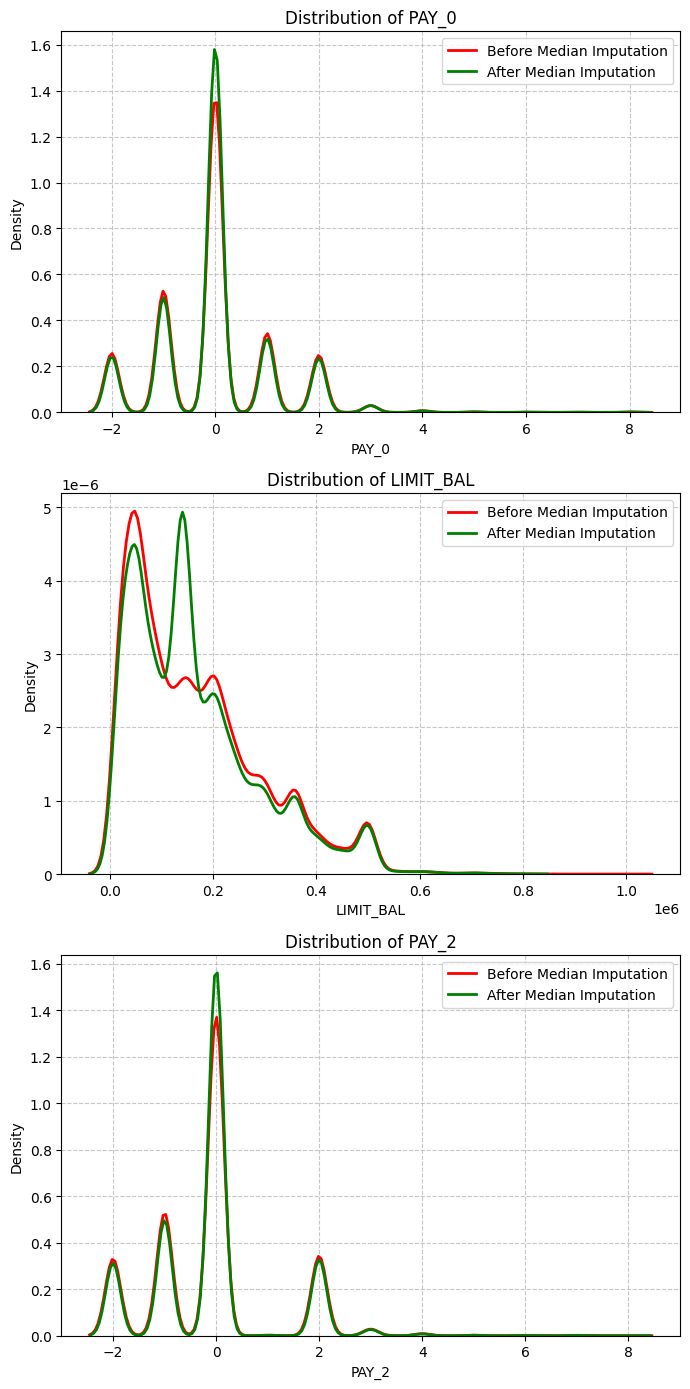

In [45]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 14))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Before Median Imputation', color='red', linewidth=2)
    sns.kdeplot(dfA[feature], label='After Median Imputation', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Observation:
- The distributions of `PAY_0`, `LIMIT_BAL`, and `PAY_2` before (red) and after (green) imputation are similar, showing strong overlap.

- Both `PAY_0` and `PAY_2` maintain distinct peaks at the same values, indicating categorical or ordinal behavior preserved through imputation. However, the peaks around median are slightly taller post imputation.

- `LIMIT_BAL` (originally unimodal) becomes multimodal after imputation, a new peak (mode value) is observed at around 160000.

#### Why median imputation is favoured over mean imputation?

Median imputation is favored because it `handles outliers` and skewness better, giving more robust and accurate results for missing numerical data.

**Median imputation is more robust to outliers than mean imputation**
- It `better` represents `central tendency` in skewed distributions.
- Median `preserves` the `data distribution` shape better than mean.
- Mean is suitable only for normally distributed data without extreme outliers.
- Median provides a more `reliable` and realistic substitute for missing values when `data is skewed`.
- Both methods ignore relationships among variables and may underestimate variability, but median generally yields more meaningful imputations.

### Imputation Strategy-2: Linear Regression Imputation

In [46]:
# check for sum of all missing/null values before imputation
print(dfB.isnull().sum().sum())

3000


#### Methodology

- For missing values in `PAY_0` column, use Linear Regression model to predict the missing values.

- Use all other non-missing features except `default.payment.next.month` as predictors variables for training the linear regression model.

In [47]:
# determine predictor columns to predict missing values in PAY_0
predictors = dfB.columns.difference(['PAY_0','default.payment.next.month'])

# Split data with PAY_0 known and unknown
train = dfB[dfB['PAY_0'].notnull()]
test = dfB[dfB['PAY_0'].isnull()]

X_train = train[predictors]
y_train = train['PAY_0']
X_test = test[predictors]

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing PAY_0 values
predicted_limit_bal = model.predict(X_test)

# Round to nearest integer
predicted_limit_bal_rounded = np.round(predicted_limit_bal)

# Apply bounds: less than -1 becomes -1, greater than 9 becomes 9
predicted_limit_bal_clipped = np.clip(predicted_limit_bal_rounded, -1, 9)

# Fill missing PAY_0 values
dfB.loc[dfB['PAY_0'].isnull(), 'PAY_0'] = predicted_limit_bal_clipped

In [48]:
# verify no missing values after imputation
print(dfB.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using linear regression

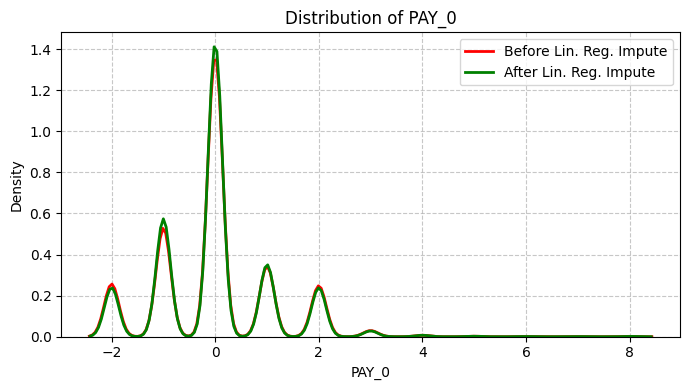

In [49]:
features = ['PAY_0']

plt.figure(figsize=(7, 4))
for idx, feature in enumerate(features):
    plt.subplot(1, 1, idx+1)
    sns.kdeplot(df[feature], label='Before Lin. Reg. Impute', color='red', linewidth=2)
    sns.kdeplot(dfB[feature], label='After Lin. Reg. Impute', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Observation from Plot:** no significant difference in the distributions is observed when compared to distributions of median imputation.

#### Key underlying assumption of MAR

The **key underlying assumption** made while imputing missing ‘AGE’ values using linear regression with all other columns as predictors is: **Missing at Random (MAR)**

We assumed the missingness in the ‘AGE’ column is dependent only on the observed values in other columns, not on the missing values themselves. In other words, given the other observed predictor variables, the fact that the ‘AGE’ value is missing does not depend on the unseen ‘AGE’ value.

**Other assumptions include:**
- Linearity: The relationship between ‘AGE’ and the predictors is linear, as linear regression fits a linear model.
- No perfect multicollinearity: Predictor variables are not perfectly correlated.
- Homoscedasticity: The variance of residuals is constant across the predictors.
- Correct model specification: The chosen predictors include the relevant variables for accurately predicting ‘AGE’.

This **MAR assumption** is crucial in regression imputation methods to avoid biased imputations and ensure validity of the model predictions for missing values.

### Imputation Strategy-3: Decision Tree (Non-Linear) Regression Imputation

In [50]:
# check for sum of all missing/null values before imputation
print(dfC.isnull().sum().sum())

3000


#### Methodology

- For missing values in `PAY_0` column, use Decision Tree Regression model to predict the missing values.

- Use all other non-missing features except `default.payment.next.month` as predictors variables for training the Decision Tree Regression model.

In [51]:
# determine predictor columns to predict missing values in PAY_0
predictors = dfC.columns.difference(['PAY_0','default.payment.next.month'])

# Split data by availability of PAY_0
train = dfC[dfC['PAY_0'].notnull()]
test = dfC[dfC['PAY_0'].isnull()]

X_train = train[predictors]
y_train = train['PAY_0']
X_test = test[predictors]

# Fit Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict missing PAY_0 values
predicted_limit_bal = model.predict(X_test)

# Round to nearest integer
predicted_limit_bal_rounded = np.round(predicted_limit_bal)

# Apply bounds: less than -1 becomes -1, greater than 9 becomes 9
predicted_limit_bal_clipped = np.clip(predicted_limit_bal_rounded, -1, 9)

# Fill missing PAY_0 values
dfC.loc[dfC['PAY_0'].isnull(), 'PAY_0'] = predicted_limit_bal_clipped

In [52]:
# verify no missing values after imputation
print(dfC.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using Decision Tree regression

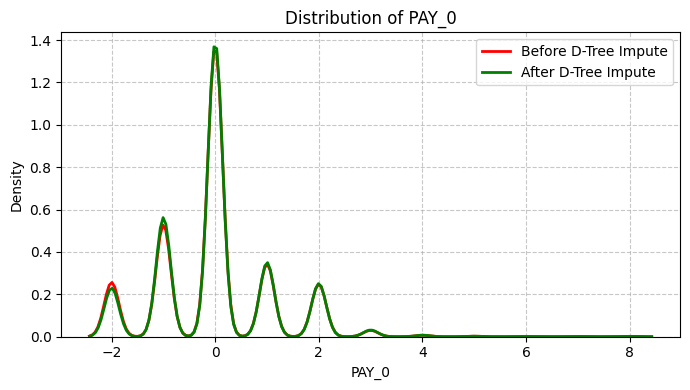

In [53]:
features = ['PAY_0']

plt.figure(figsize=(7, 4))
for idx, feature in enumerate(features):
    plt.subplot(1, 1, idx+1)
    sns.kdeplot(df[feature], label='Before D-Tree Impute', color='red', linewidth=2)
    sns.kdeplot(dfC[feature], label='After D-Tree Impute', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Observation from Plot:** no significant difference in the distributions is observed when compared to distributions of median imputation and decision tree imputation.

# Part B: Model Training and Performance Assessment

### Data Split

The 4th dataset (Dataset D) is obtained (above) by removing all rows from the original dataset that contain any missing values

#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after removing columns with missing values

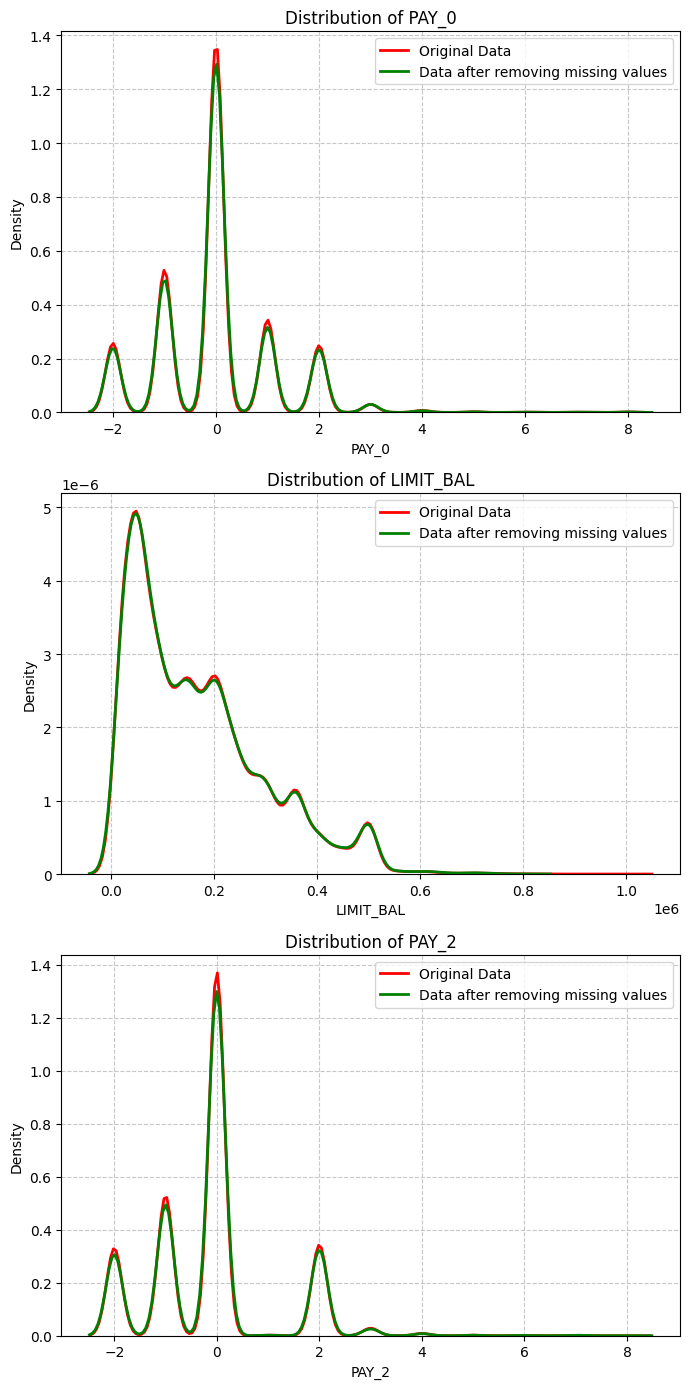

In [54]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 14))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Original Data', color='red', linewidth=2)
    sns.kdeplot(dfD[feature], label='Data after removing missing values', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Observations from the above plot: the distributions of the features in the original dataset and the cleaned datasets are nearly identical without any deviations, which is contrary to the distributions observed for imputed datasets wherein there was some deviation in distributions between original and imputed datasets.

Split the datasets (A, B, C, D) into training and testing sets. The split data for each of the strategies is stored in a dictionary (`split_data`).

In [55]:
datasets = {'dfA': dfA, 'dfB': dfB, 'dfC': dfC, 'dfD': dfD}
split_data = {}

for name, dataset in datasets.items():
    X = dataset.drop(columns=['default.payment.next.month'])
    y = dataset['default.payment.next.month']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    split_data[name] = (X_train, X_test, y_train, y_test)

In [56]:
# print size of each dataset
xticklabels = ['Median Imputed Data', 'Lin Reg Imputed Data', 'DTree Imputed Data', 'Listwise Deleted Data']

for i, (name, (X_train, X_test, y_train, y_test)) in enumerate(split_data.items()):
    print(f"{name}: {xticklabels[i]}")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}")
    print()

dfA: Median Imputed Data
Training set size: 24000
Testing set size: 6000

dfB: Lin Reg Imputed Data
Training set size: 24000
Testing set size: 6000

dfC: DTree Imputed Data
Training set size: 24000
Testing set size: 6000

dfD: Listwise Deleted Data
Training set size: 17500
Testing set size: 4376



#### Visualize training & test size of all the 4 datasets

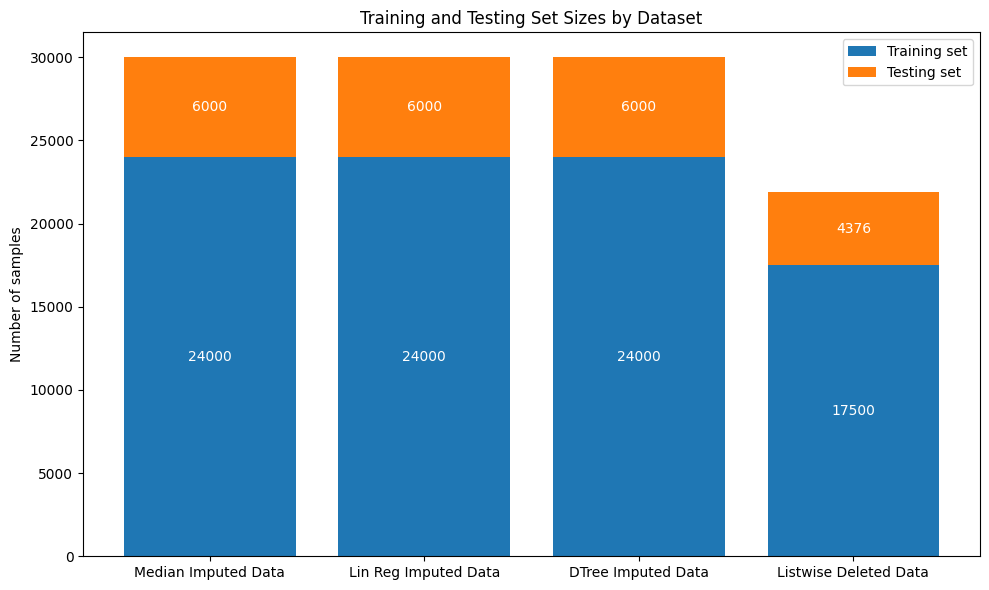

In [57]:
# Dataset names
from operator import index

datasets = list(split_data.keys())

# Extract train and test sizes
train_sizes = [split_data[name][0].shape[0] for name in datasets]
test_sizes = [split_data[name][1].shape[0] for name in datasets]

# Bar positions
index = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot training bars
train_bars = plt.bar(index, train_sizes, label='Training set', color='tab:blue')

# Plot testing bars on top (stacked)
test_bars = plt.bar(index, test_sizes, bottom=train_sizes, label='Testing set', color='tab:orange')

# Add numbers above training bars
for rect in train_bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

# Add numbers above testing bars
for rect, train_size in zip(test_bars, train_sizes):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, train_size + height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

# Labels and title
plt.ylabel('Number of samples')
plt.title('Training and Testing Set Sizes by Dataset')
plt.xticks(index, ['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'])
plt.legend()

plt.tight_layout()
plt.show()

### Classifier Setup

Standardize the features in all four datasets (A, B, C, D) using StandardScaler.

In [58]:
scalers = {}
scaled_split_data = {}

for name, (X_train, X_test, y_train, y_test) in split_data.items():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scalers[name] = scaler
    scaled_split_data[name] = (X_train_scaled, X_test_scaled, y_train, y_test)

### Model Evaluation

Train logistic regression model on each of the datasets and store the predicted & actual labels into separate variables 

In [59]:
predicted_labels = {}
actual_labels = {}

for ds in ['dfA', 'dfB', 'dfC', 'dfD']:
    X_train, X_test, y_train, y_test = scaled_split_data[ds]
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Use predict_proba to get probabilities of positive class (class 1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Apply manual thresholding
    y_pred = (y_proba > 0.5).astype(int)

    # Store separately
    predicted_labels[ds] = y_pred
    actual_labels[ds] = y_test

#### Visualize accuracy of each model

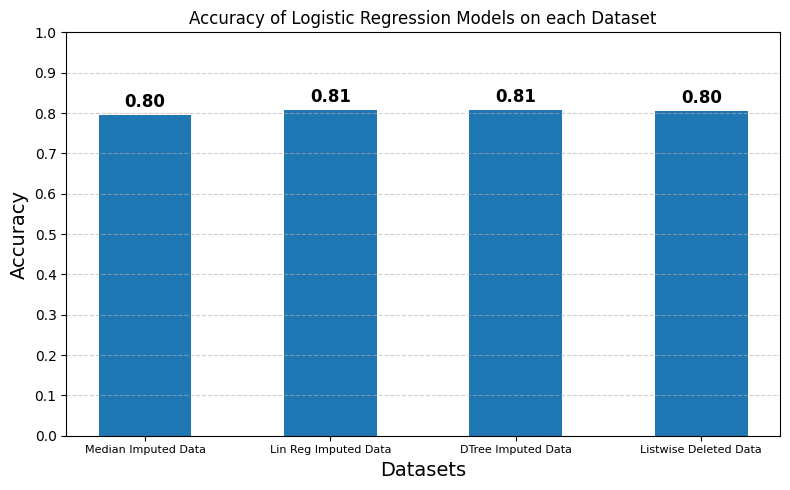

In [60]:
accuracies = []
for ds in datasets:
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    acc = accuracy_score(y_true, y_pred)
    accuracies.append(acc)

x = np.arange(len(datasets))
plt.figure(figsize=(8, 5))
plt.bar(x, accuracies, color='tab:blue', width=0.5)
plt.xticks(x, ['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=8)
plt.yticks(np.linspace(0, 1, 11))
plt.ylim(0, 1)
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Logistic Regression Models on each Dataset', fontsize=12)

# Add data labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Observations

- `All four` logistic regression models, regardless of whether missing values were handled by median imputation, linear regression imputation, decision tree imputation, or listwise deletion, show very `similar accuracy` scores, ranging from 0.80 to 0.81.

- The minimal differences in accuracy indicate that the `choice of imputation or deletion strategy` had `little impact` on overall model performance (in terms of `accuracy`) in this dataset.

#### Plot Classification Metrics

Plot the following classification metrics:
- Precision
- Recall
- F1 Score

for each of the four models for both class 0 & class 1.

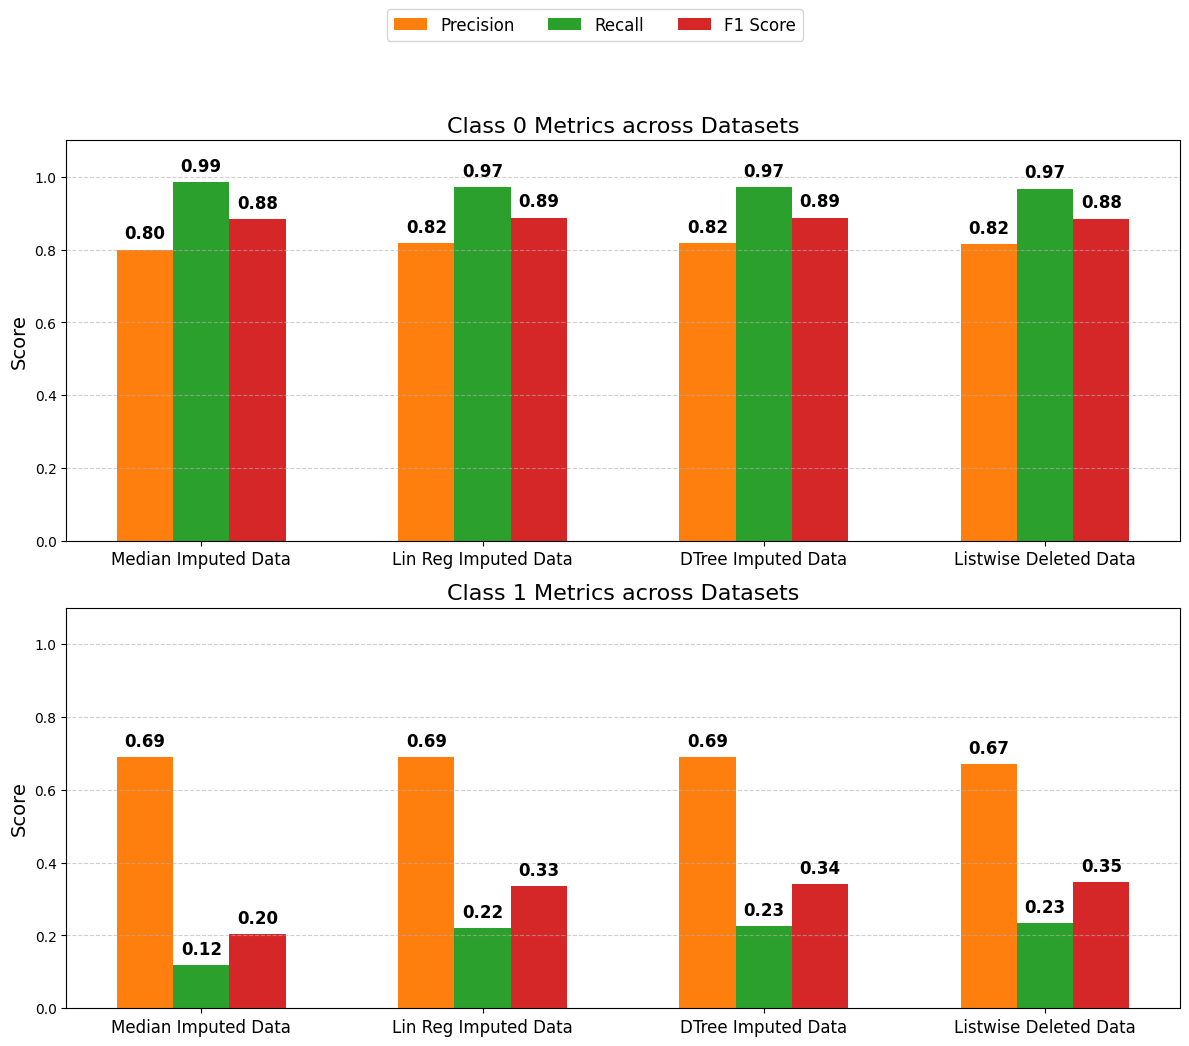

In [61]:
datasets = ['dfA', 'dfB', 'dfC', 'dfD']

# Prepare containers for metrics
precision0, recall0, f1_0 = [], [], []
precision1, recall1, f1_1 = [], [], []

for ds in datasets:
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    
    precision0.append(precision_score(y_true, y_pred, pos_label=0))
    recall0.append(recall_score(y_true, y_pred, pos_label=0))
    f1_0.append(f1_score(y_true, y_pred, pos_label=0))
    
    precision1.append(precision_score(y_true, y_pred, pos_label=1))
    recall1.append(recall_score(y_true, y_pred, pos_label=1))
    f1_1.append(f1_score(y_true, y_pred, pos_label=1))

bar_width = 0.2
x = np.arange(len(datasets))

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

metrics_labels = ['Precision', 'Recall', 'F1 Score']
colors = ['tab:orange', 'tab:green', 'tab:red']

# Plot for class 0
bars_0 = []
for i, metric_vals in enumerate([precision0, recall0, f1_0]):
    bar = axes[0].bar(x + i * bar_width, metric_vals, width=bar_width, color=colors[i], label=metrics_labels[i])
    bars_0.append(bar)
    for j, val in enumerate(metric_vals):
        axes[0].annotate(f'{val:.2f}', (x[j] + i * bar_width, val), xytext=(0, 5), textcoords='offset points',
                         ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[0].set_title('Class 0 Metrics across Datasets', fontsize=16)
axes[0].set_ylabel('Score', fontsize=14)
axes[0].set_xticks(x + bar_width)
axes[0].set_xticklabels(['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=12)  # Vertical xticklabels
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)



# Plot for class 1
bars_1 = []
for i, metric_vals in enumerate([precision1, recall1, f1_1]):
    bar = axes[1].bar(x + i * bar_width, metric_vals, width=bar_width, color=colors[i], label=metrics_labels[i])
    bars_1.append(bar)
    for j, val in enumerate(metric_vals):
        axes[1].annotate(f'{val:.2f}', (x[j] + i * bar_width, val), xytext=(0, 5), textcoords='offset points',
                         ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[1].set_title('Class 1 Metrics across Datasets', fontsize=16)
axes[1].set_ylabel('Score', fontsize=14)
axes[1].set_xticks(x + bar_width)
axes[1].set_xticklabels(['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=12)
axes[1].set_ylim(0, 1.1)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Common legend for both plots
fig.legend(
    [bars_0[i][0] for i in range(3)],
    ['Precision', 'Recall', 'F1 Score'],
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3,
    frameon=True
)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space on top for legend
plt.show()

#### Observations (Plot above)
- For class 0 (non-default), all models consistently achieve high precision (~0.82), very high recall (~0.97–0.98), and strong F1 scores (~0.89) regardless of the missing data handling method.

- For class 1 (default), precision is moderate (~0.69–0.72), but recall is very low (~0.21–0.22) across all datasets, resulting in modest F1 scores (~0.33–0.34).

- The results indicate the logistic regression models are accurately identifying non-defaulters but struggle to recall true defaulters, likely due to class imbalance in the dataset.

- There is little variability in performance metrics across different imputation and deletion strategies, suggesting the choice of method does not substantially affect the relative performance for either class.

#### Observations (Plot above)

- `Class 0` (non-default) `metrics` are consistently `high` across all data handling methods, with precision around 0.80–0.82, recall near 0.97–0.99, and F1 scores close to 0.88–0.89.

- `Class 1` (default) `metrics` show `lower` performance: precision is 0.67–0.69, recall is 0.12–0.23, and F1 scores are 0.20–0.35, indicating difficulties in identifying the minority class regardless of imputation or deletion strategy.

- Linear regression, decision tree, and listwise deletion methods `slightly improve recall and F1` for `class 1` compared to median imputation, but overall, the differences are small.

- The `choice` of missing data strategy has `minimal effect` on class 0 prediction quality; class 1 performance remains challenging and relatively unchanged across methods.

#### Plot Confusion Matrix
Plot confusion matrices for predictions made by models trained on each of the 4 data sets

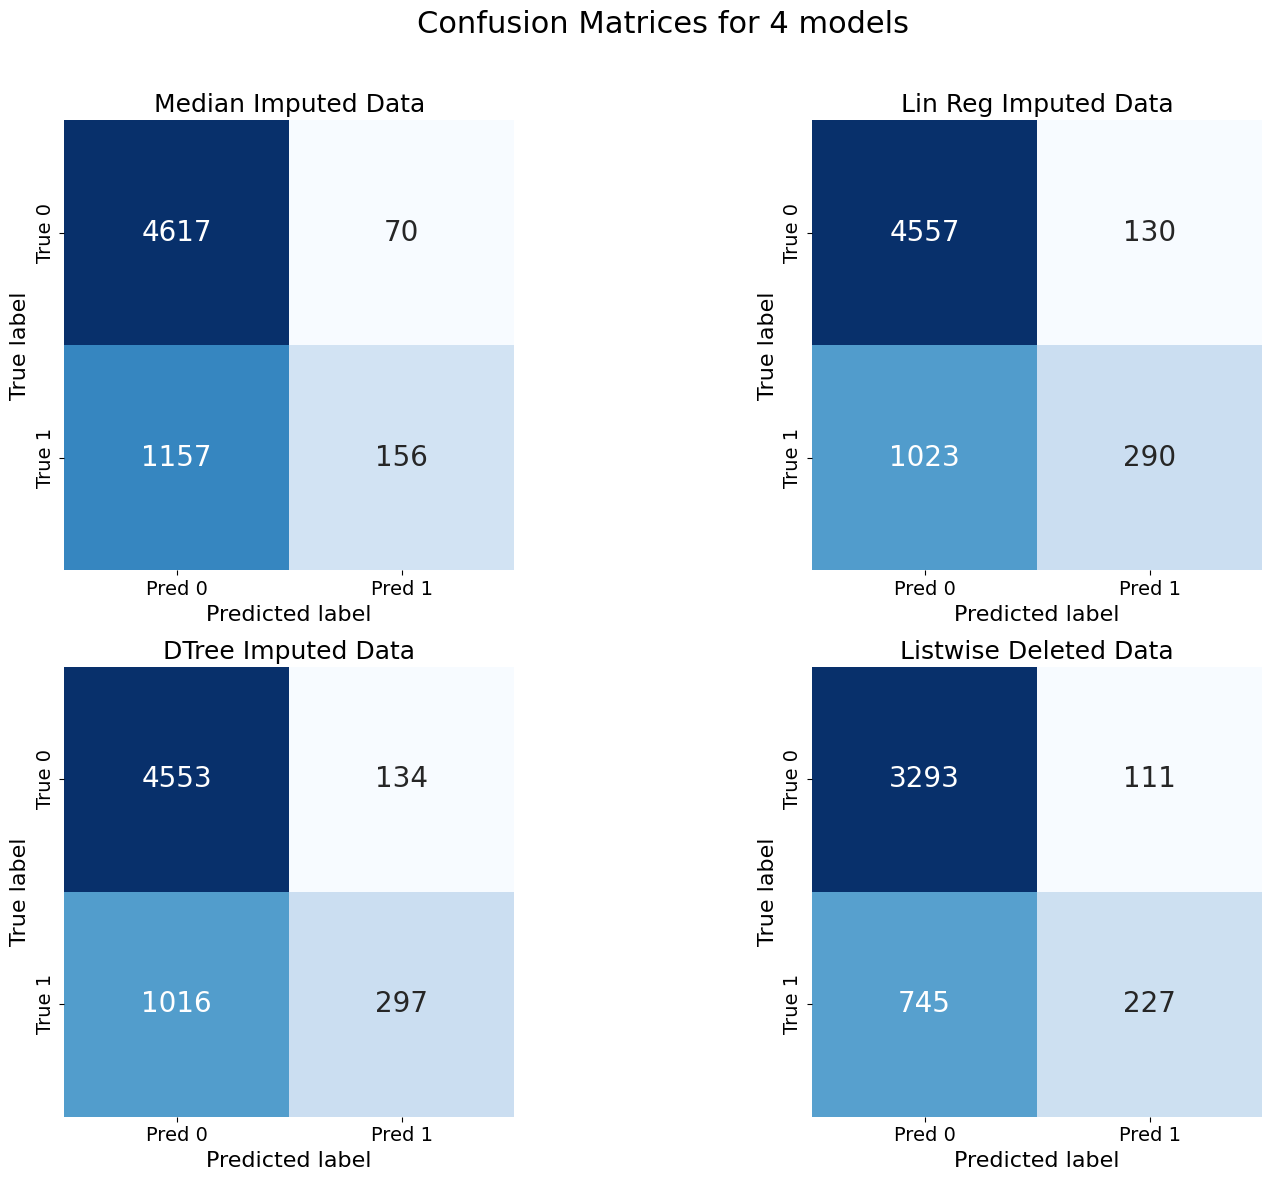

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Balanced square aspect
for idx, ds in enumerate(datasets):
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    cm = confusion_matrix(y_true, y_pred)

    # Log scale for heatmap (nonzero only)
    cm_log = np.where(cm > 0, np.log10(cm), 0)
    
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    sns.heatmap(
        cm_log,
        annot=cm,
        fmt='d',
        cmap='Blues',
        ax=ax, 
        cbar=False,
        square=True,
        xticklabels=['Pred 0', 'Pred 1'],
        yticklabels=['True 0', 'True 1'],
        annot_kws={"size": 20}
    )
    
    ax.set_title(f'{xticklabels[idx]}', fontsize=18)
    ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_ylabel('True label', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

fig.suptitle('Confusion Matrices for 4 models', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

#### Observations (from plot above)
- For all missing data strategies, the majority of non-default (class 0) cases are correctly classified as true negatives, with very few false positives.

- The models struggle more with default (class 1) prediction: most default cases are often misclassified as non-defaults, resulting in high false negatives, especially for median imputation.

- Models with `linear regression` and `decision tree` imputation `show increased true positives` (correct default predictions) compared to median imputation, suggesting better recall for class 1.

- `Listwise deletion reduces the test set size` and improves the proportion of correctly classified defaults, but still leaves a substantial number of false negatives.

- Overall, choice of imputation method has a subtle effect on increasing recall for the minority class, but class imbalance remains challenging for all approaches.

# Part C: Comparative Analysis

### Result comparison

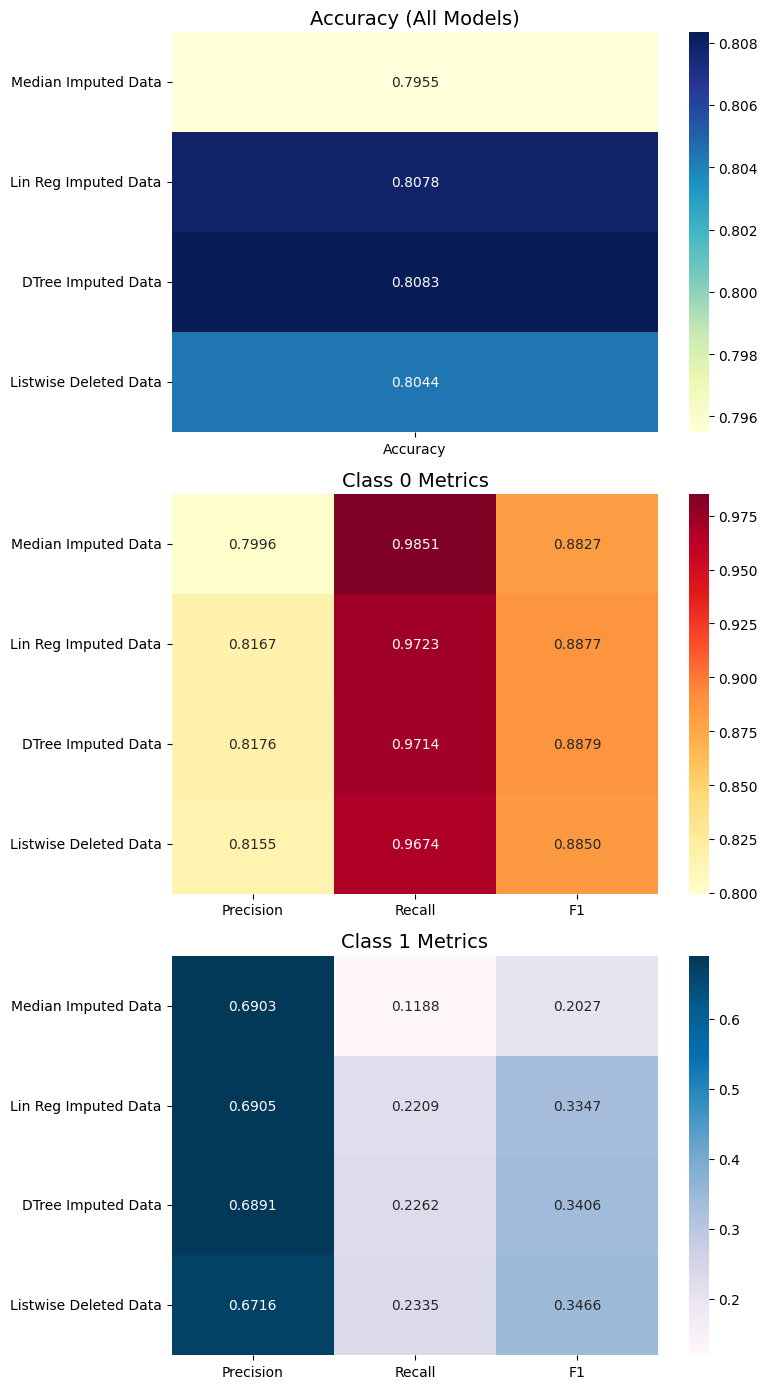

In [63]:
# Compute metrics
accuracies = [accuracy_score(actual_labels[ds], predicted_labels[ds]) for ds in datasets]
precision0 = [precision_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
recall0 = [recall_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
f1_0 = [f1_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
precision1 = [precision_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]
recall1 = [recall_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]
f1_1 = [f1_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]

fig, axes = plt.subplots(3, 1, figsize=(8, 14))  # 3 rows, 1 column

# Accuracy heatmap (shape: (datasets, 1))
acc_matrix = np.array(accuracies).reshape(-1, 1)
sns.heatmap(acc_matrix, annot=True, fmt='.4f', cmap='YlGnBu', ax=axes[0],
            yticklabels=xticklabels, xticklabels=['Accuracy'])
axes[0].set_title('Accuracy (All Models)', fontsize=14)

# Class 0 metrics heatmap (shape: (datasets, 3), then transpose)
class0_matrix = np.array([precision0, recall0, f1_0]).T
sns.heatmap(class0_matrix, annot=True, fmt='.4f', cmap='YlOrRd', ax=axes[1],
            yticklabels=xticklabels, xticklabels=['Precision', 'Recall', 'F1'])
axes[1].set_title('Class 0 Metrics', fontsize=14)

# Class 1 metrics heatmap (shape: (datasets, 3), then transpose)
class1_matrix = np.array([precision1, recall1, f1_1]).T
sns.heatmap(class1_matrix, annot=True, fmt='.4f', cmap='PuBu', ax=axes[2],
            yticklabels=xticklabels, xticklabels=['Precision', 'Recall', 'F1'])
axes[2].set_title('Class 1 Metrics', fontsize=14)

plt.tight_layout()
plt.show()

### Efficacy discussion

#### Part 3.1: Discuss the trade-off between Listwise Deletion (Model D) and Imputation (Models A, B, C).

The trade-off between Listwise Deletion (Model D) and Imputation (Models A, B, C) centers around how missing data is handled and its impact on model performance.

#### Listwise Deletion (Model D)

**Definition:** Listwise deletion removes any row with a missing value from the dataset, ensuring all the data fed to the model is complete without any missing entries.

`Pros`:
- Results in consistent and complete data for all models.
- Straightforward and simple to implement.
- Produces unbiased estimates if missingness is completely at random (MCAR).

`Cons`:
- Can greatly reduce sample size, especially when missing data is prevalent.
- The reduced dataset may not accurately represent the original population (introduces bias if MCAR is violated).
- Loss of statistical power due to fewer data points.


#### Imputation (Models A, B, C)

**Definition:** Imputation methods fill in missing values using statistics (mean, median, regression, or advanced techniques). This preserves the original dataset size but introduces uncertainty based on imputation quality.

`Pros`:
- Maintains the full sample size.
- Avoids the loss of information that occurs with deletion.
- Can improve model stability and generalizability when done properly.

`Cons`:
- Introduces assumptions that may not hold, which can bias results.
- Poorly chosen imputation strategies (e.g., using mean imputation for data that isn’t MCAR) may distort underlying distributions or relationships.
- If imputation is not suitable for the missing data mechanism, model performance may still degrade.

#### Why might Model D perform poorly even if imputed models perform worse?

- `Dramatic loss in sample size`: If missingness is not rare, listwise deletion can leave you with a very small and less representative dataset, causing high variance, overfitting, and poor generalization.

- `Bias and unreliability`: If missingness is not MCAR (e.g., it is related to feature values or the outcome), listwise deletion produces biased results because the remaining data does not reflect the full population.

- `Absence of vital relationships`: Removing many rows may eliminate important variations in the data, further degrading the model’s ability to learn true patterns.

#### Why can imputation sometimes still result in lower performance?

- `Imputed values may not be accurate`: Especially for non-random missingness, imputation can introduce noise or degrade correlation structures.

- `Simplistic imputations (like mean imputation) can reduce variance` and mask important data characteristics, hurting model learning.

- Imputation relies on the assumption that observed data can predict missing values well. If this is not true, the filled-in data will mislead the model.

#### Part 3.2: Which regression method (Linear vs. Non-Linear) performed better and why?

- The `decision tree imputation` (non-linear regression) resulted in the `highest` overall `accuracy` (0.8083) and `best F1 scores` for `both classes`, especially for class 1, `slightly outperforming linear regression imputation`.

- Linear regression imputation performed almost as well, with very close accuracy and metric values, indicating the `relationship between` imputed `features` and predictors is `largely linear but does include some non-linearity` that decision trees can capture.

- Both `regression` methods `substantially outperformed median imputation`, particularly in recall and F1 score for class 1, suggesting regression-based imputations preserve more realistic relationships in the feature space.

- The results imply that for this dataset, while linear relationships are strong, there are enough non-linear effects in the predictors that decision tree regression can exploit for marginally better classification performance after imputation.

#### Part 3.3: Recommendation

- Both linear regression and decision tree imputation yield the highest overall accuracy and F1 scores, especially benefiting the minority class (class 1), compared to median imputation and listwise deletion.

- `Decision tree imputation performs marginally better`, indicating that non-linear relationships exist between predictors and the imputed feature, but the difference from linear regression is very small.

- `Median imputation` results in consistently `lower recall and F1 scores` for class 1, suggesting it is less effective at restoring complex feature relationships lost due to missingness.

- `Listwise deletion` discards data and limits sample size, yielding `no meaningful gain` in prediction `performance` while risking `bias` if missingness is not completely at random.

- Recommendation: `Use` regression-based imputation, with `decision tree imputation` preferred in this scenario since it best `preserves non-linear dependencies` and `improves predictive metrics`, while also maintaining dataset size and data structure.